# How to Train YOLOv8 Instance Segmentation on a Custom Dataset

---


make sure that we have access to GPU. We can use `nvidia-smi` command to do that.

In [ ]:
!nvidia-smi

Sat Nov  4 04:49:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/78.2 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

### Download dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="xxxxxxxxxxxxxx")
project = rf.workspace("landslide-28gdu").project("landslide-area-segmentation")
dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Landslide-Area-Segmentation-1 in yolov8:: 100%|██████████| 1038/1038 [00:00<00:00, 7484.74it/s]


### Train

In [ ]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=40 patience=10
# model = YOLO('yolov8m-seg.pt')
# model.train(data=f"{dataset.location}/data.yaml", epochs=25)

/content
100% 52.4M/52.4M [00:00<00:00, 259MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/datasets/Landslide-Area-Segmentation-1/data.yaml, epochs=40, patience=10, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras

In [ ]:
#  yolo m
# Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:03<00:00,  1.01s/it]
#  all         70        140      0.935      0.993       0.99       0.78

/content


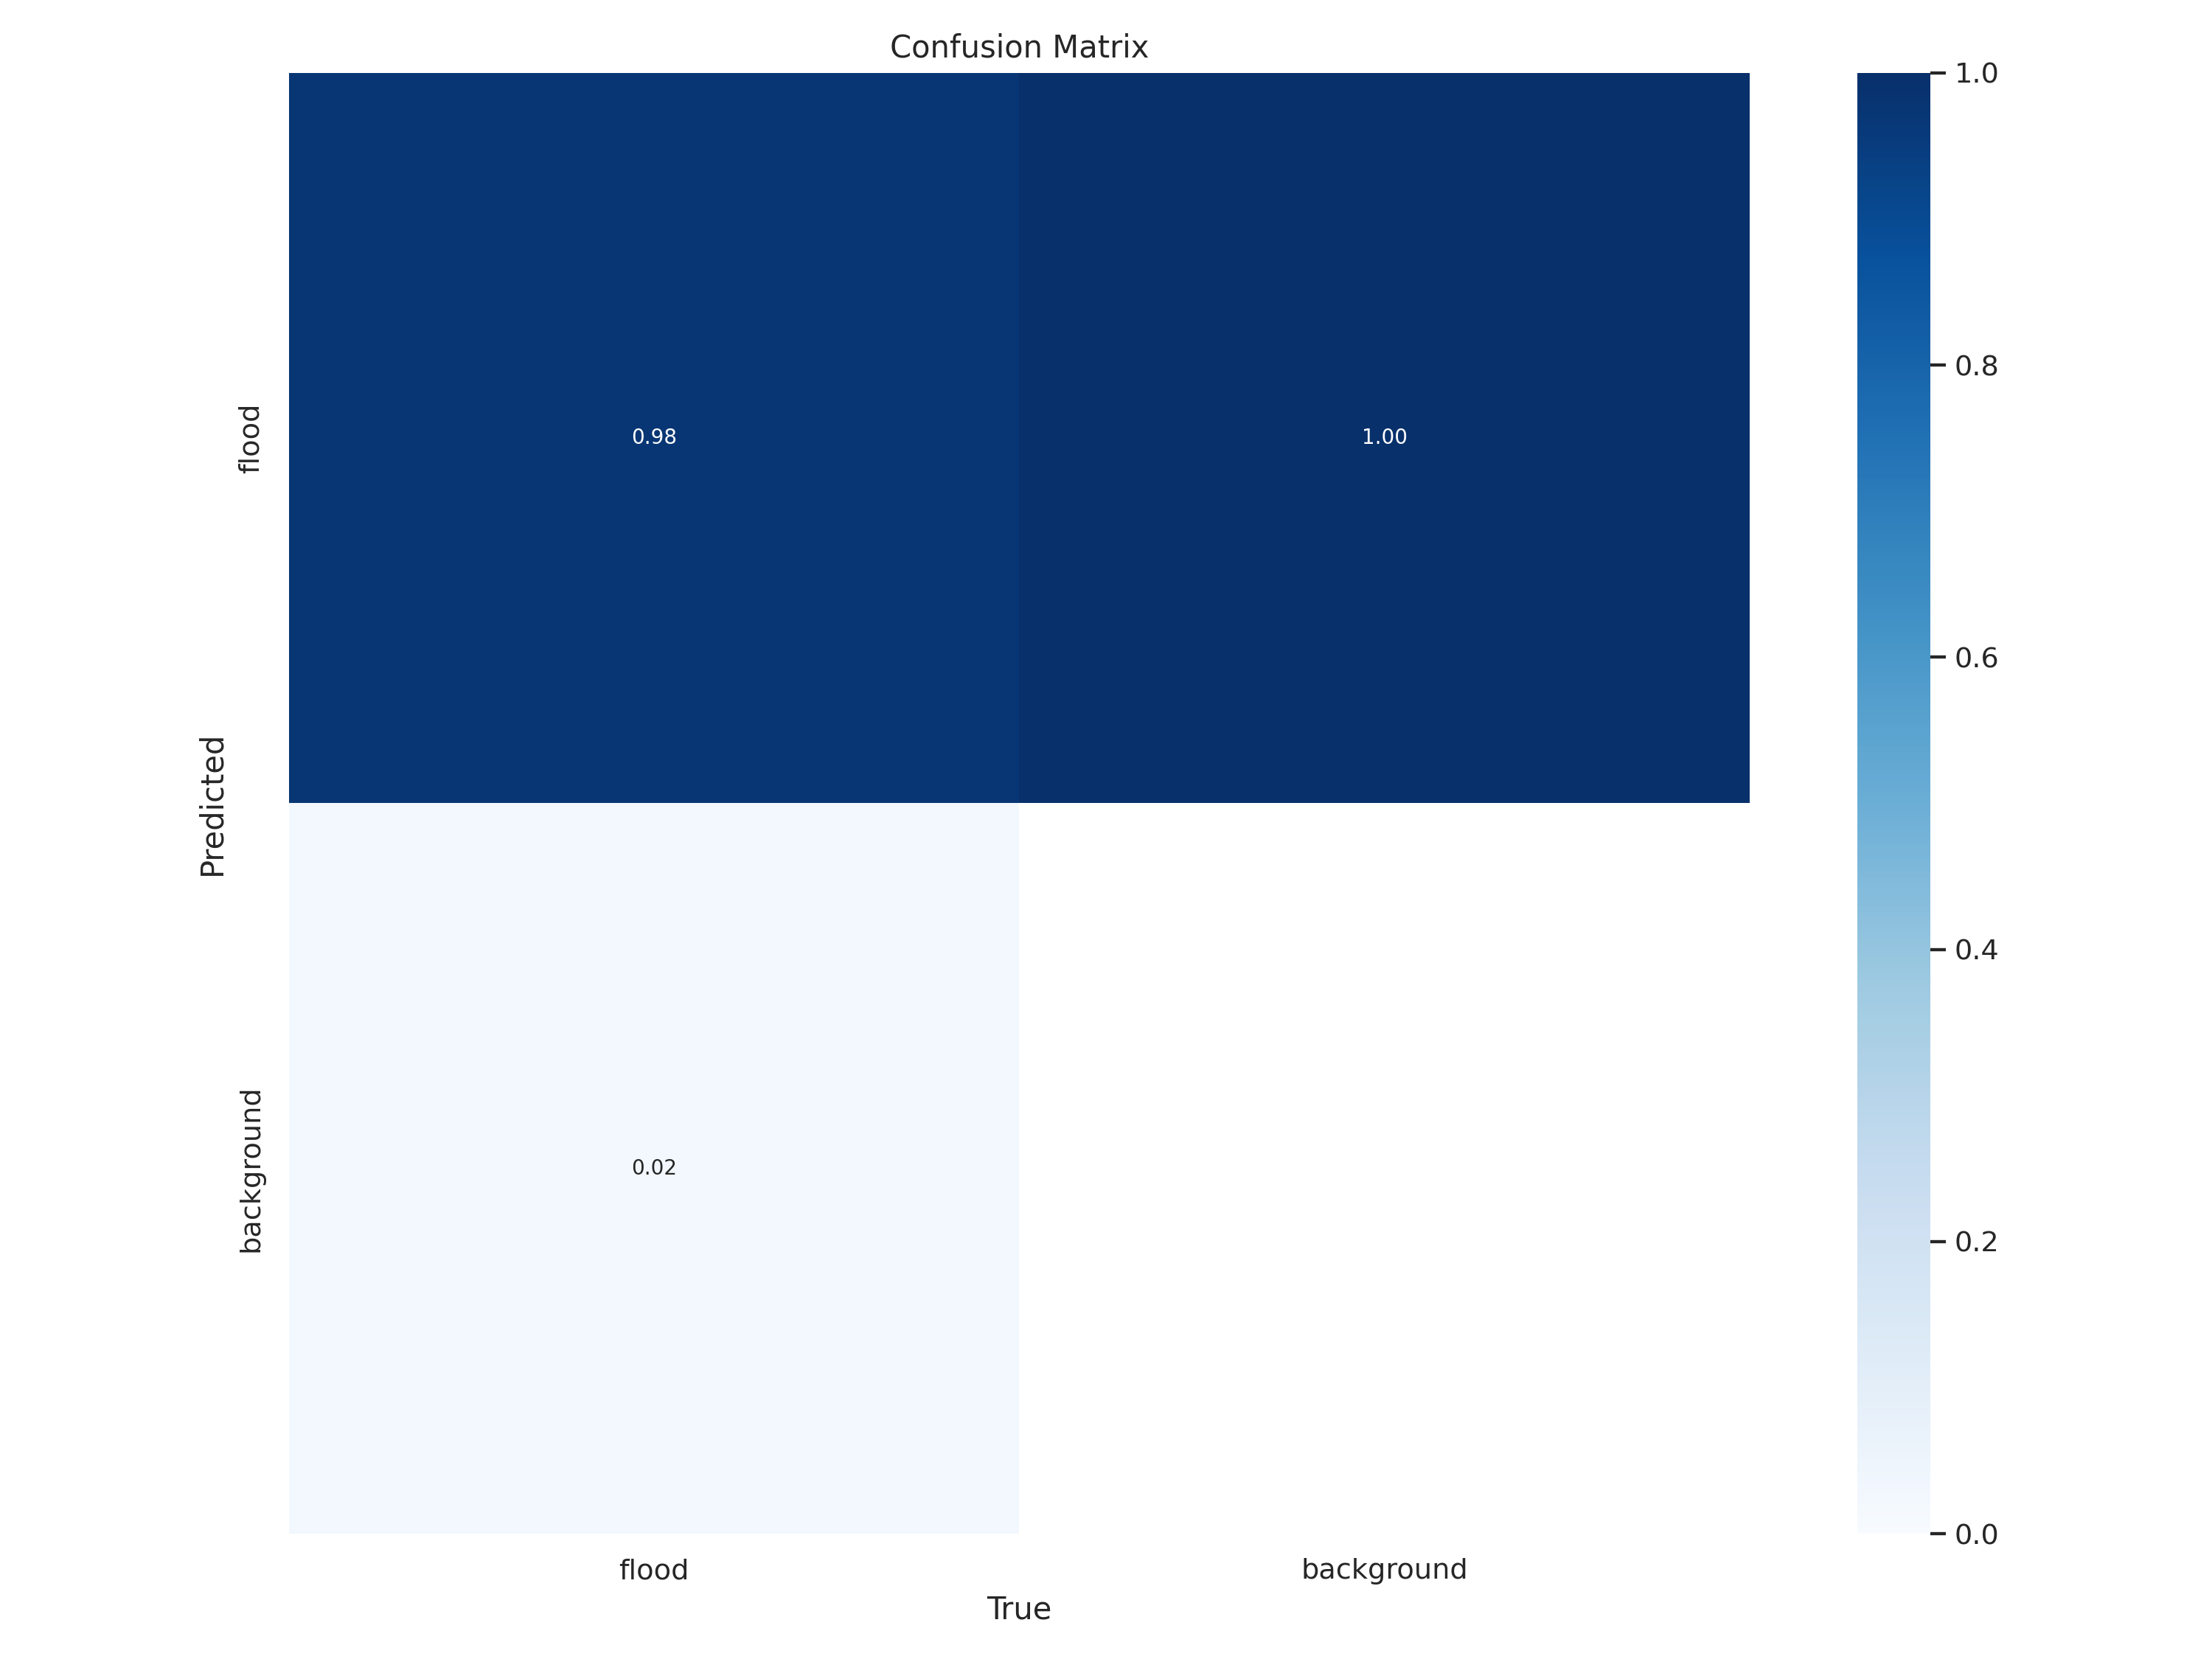

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


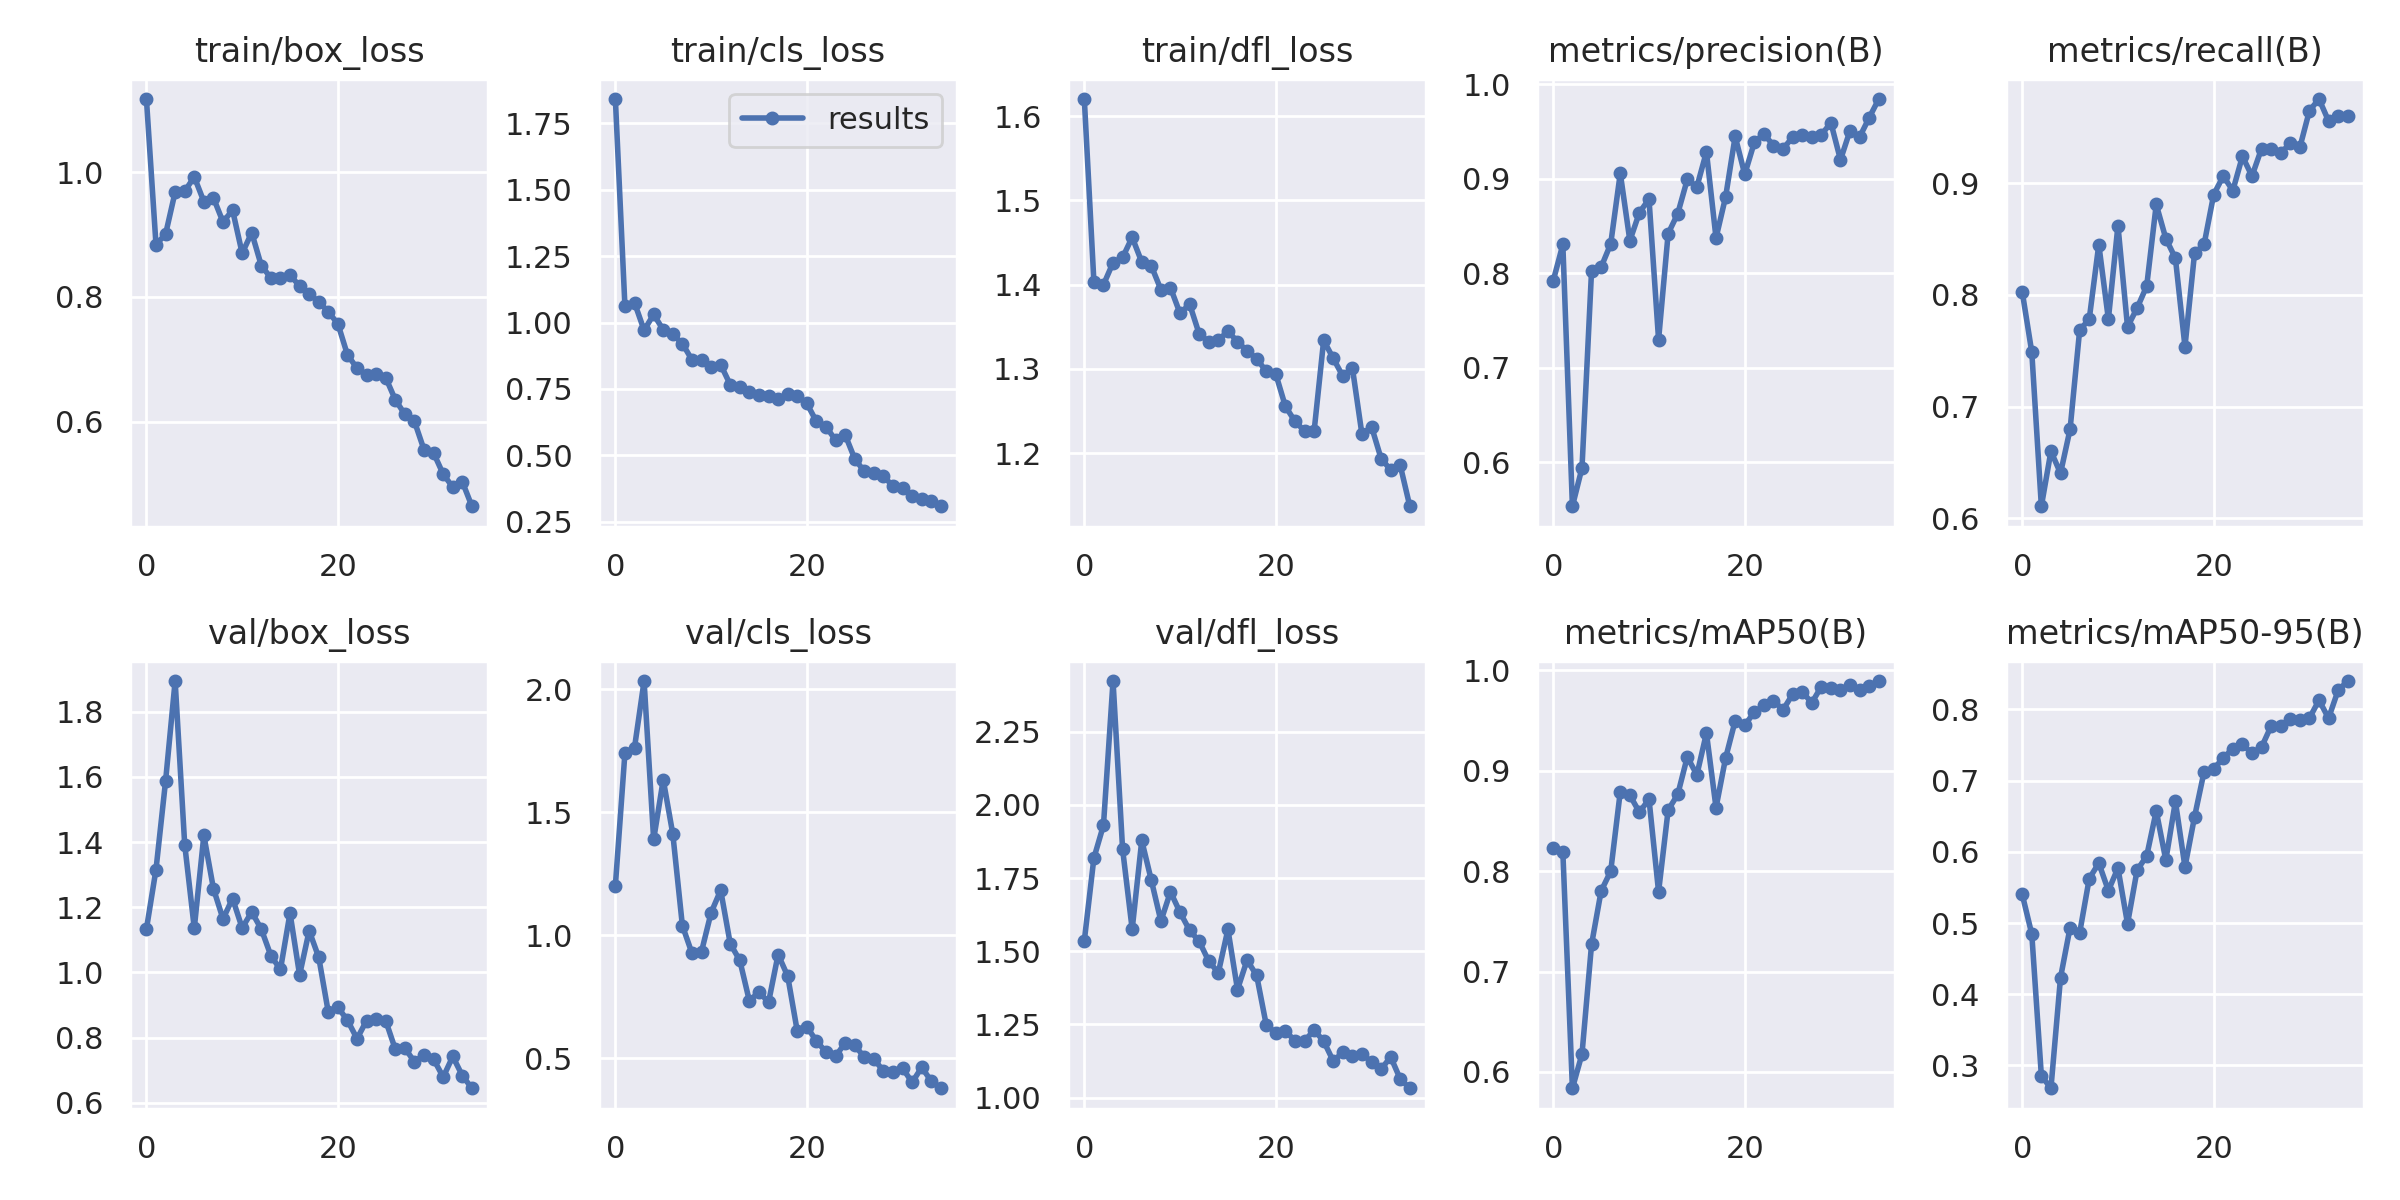

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

### Validate

/content


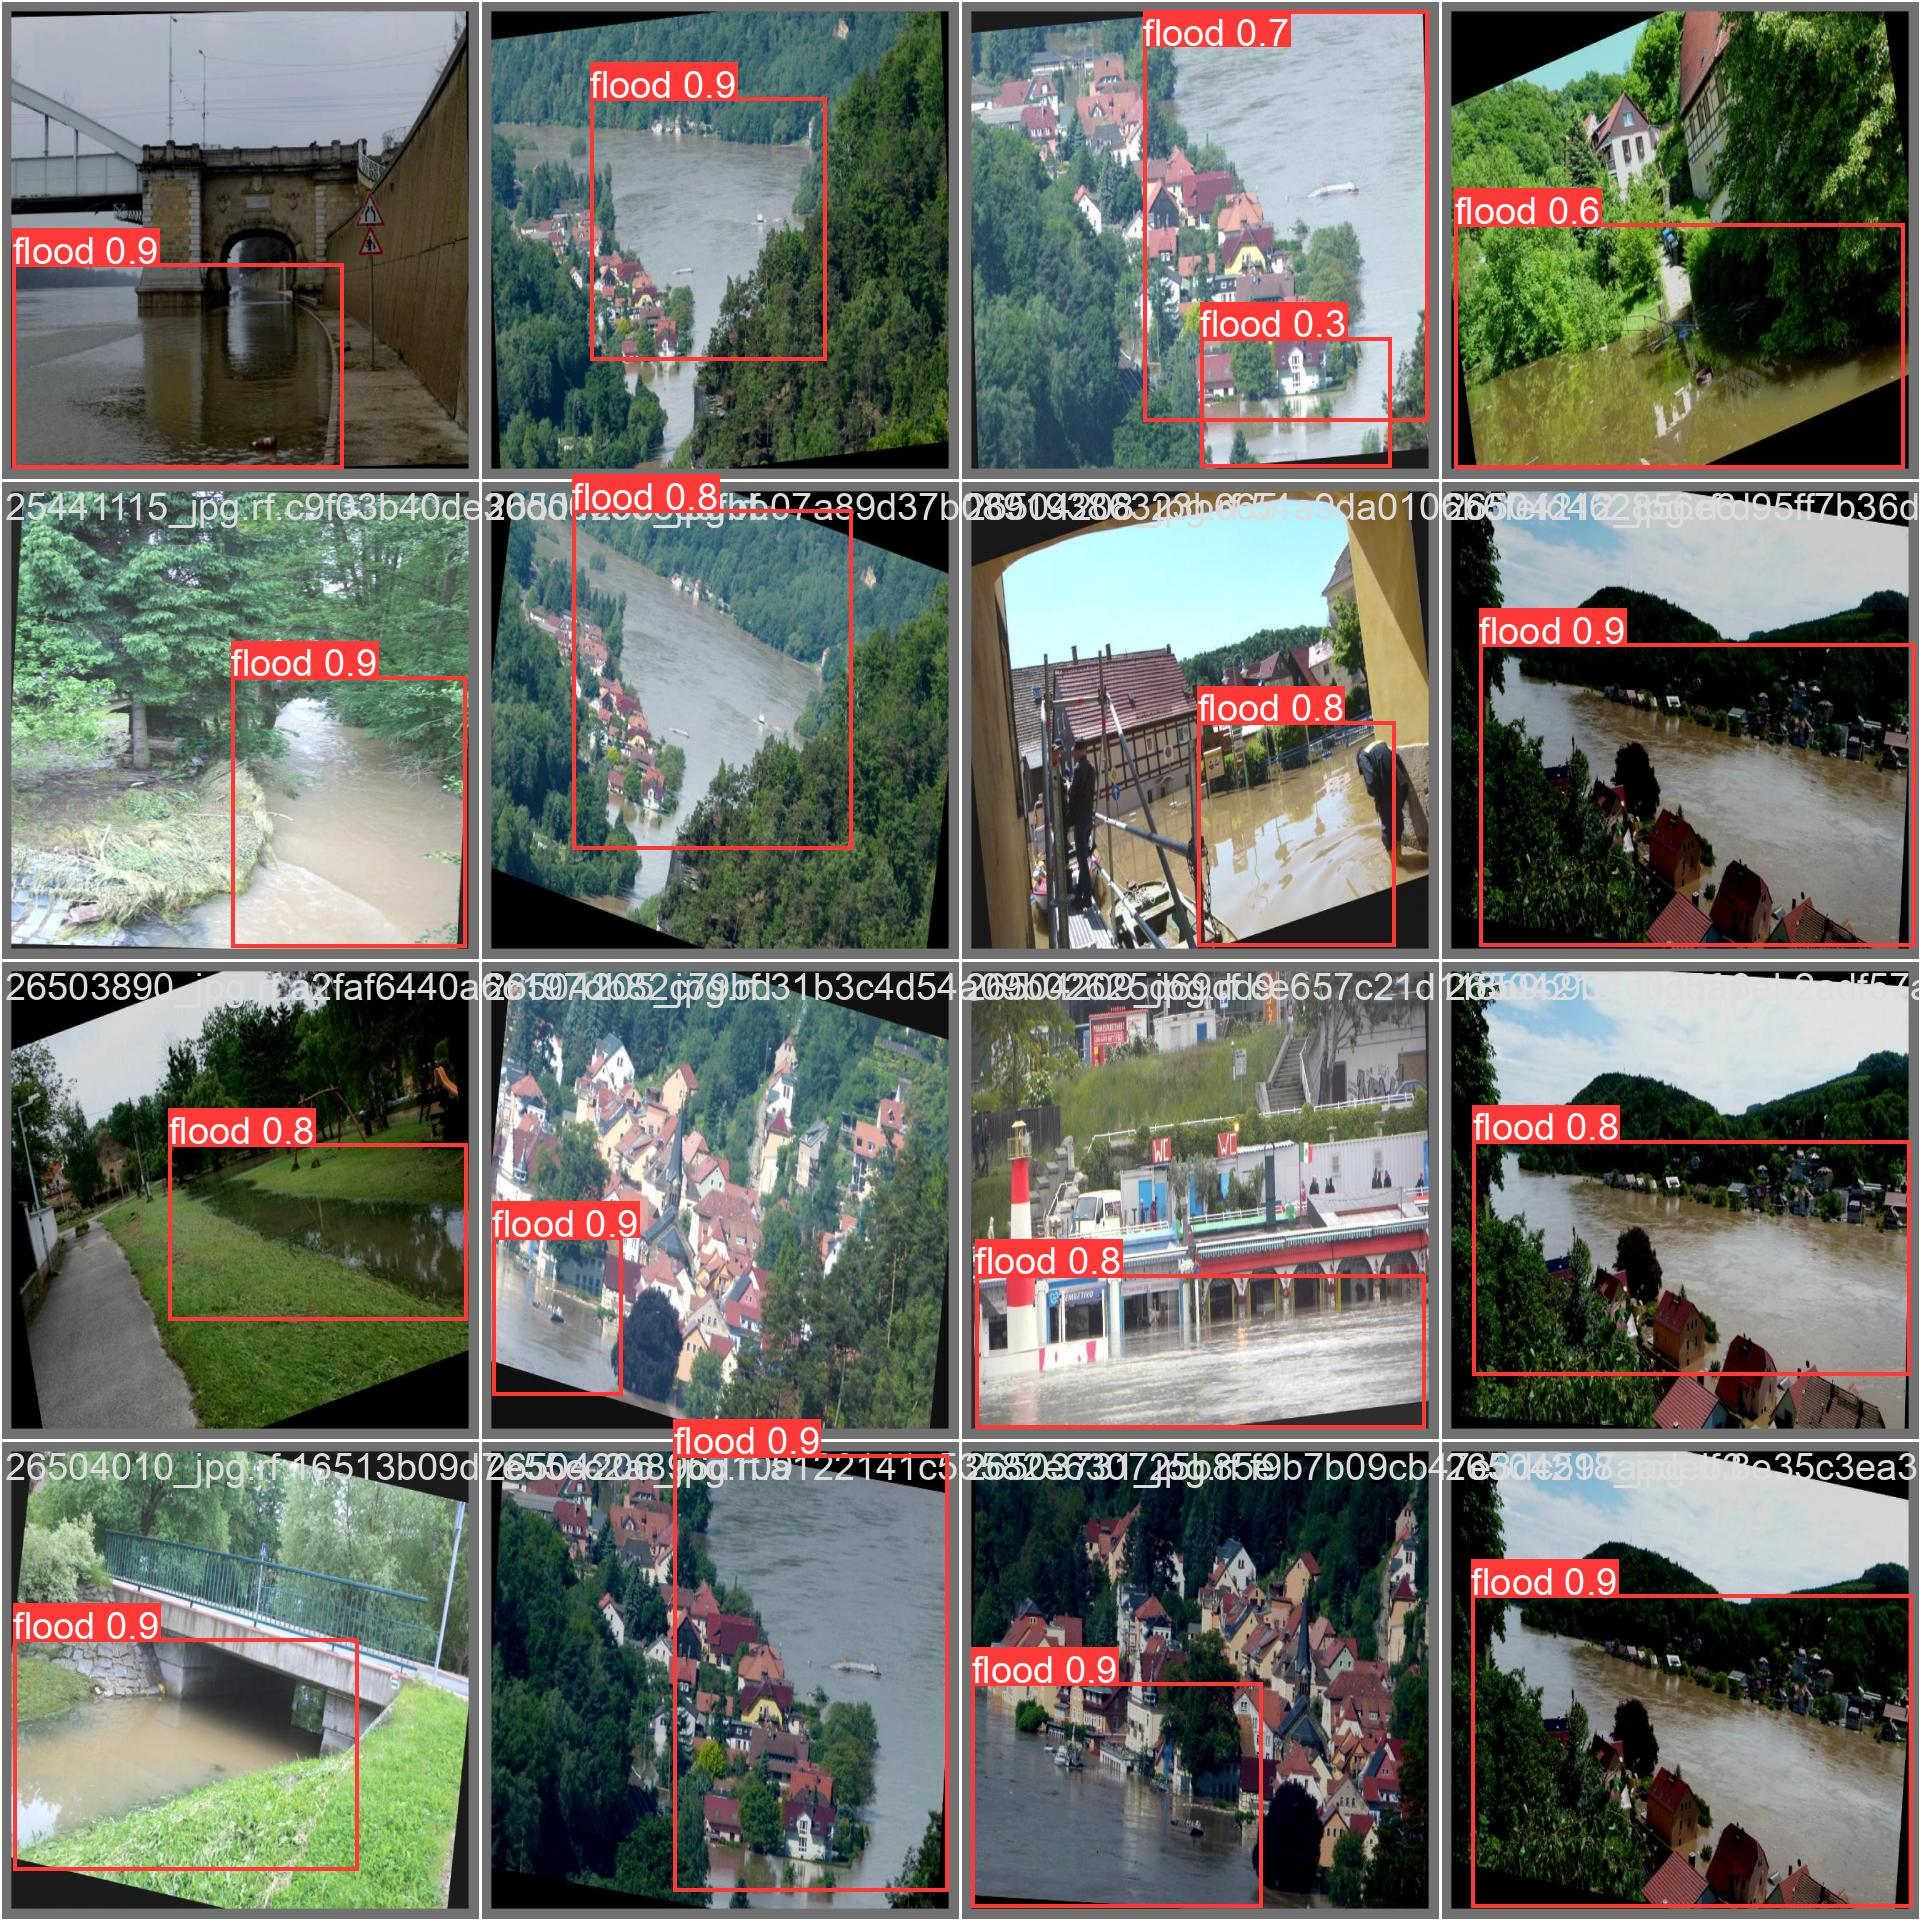

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg')

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-03 13:16:22.754971: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-03 13:16:22.755035: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-03 13:16:22.755075: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-03 13:16:22.763966: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-03 13:16:23.946714: W ten

In [ ]:
#  Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 5/5 [00:05<00:00,  1.00s/it]
#    all         70        140      0.935      0.993       0.99      0.784

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=true

/content
WARNING ⚠️ 'task=detect' conflicts with segment model /content/runs/segment/train/weights/best.pt. Inheriting 'task=segment' from /content/runs/segment/train/weights/best.pt and ignoring 'task=detect'.
2023-11-04 05:11:49.773853: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-04 05:11:49.773912: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-04 05:11:49.773945: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-04 05:11:49.781059: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions 

### Diaplay resulrs

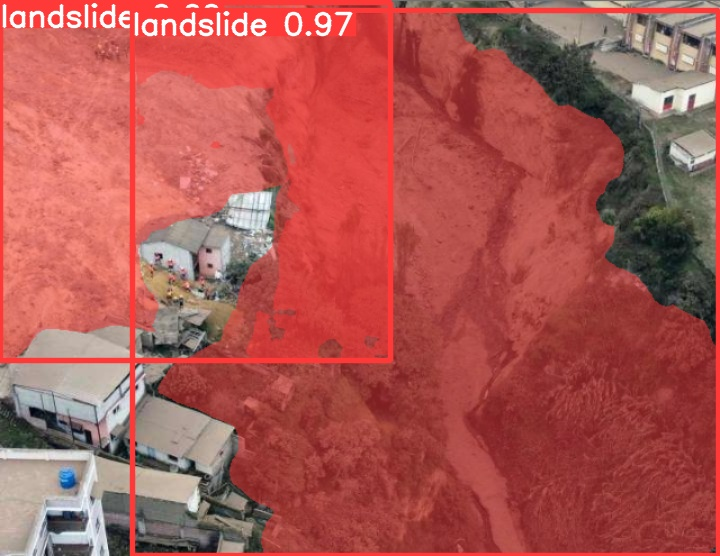

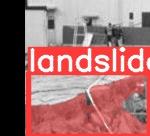

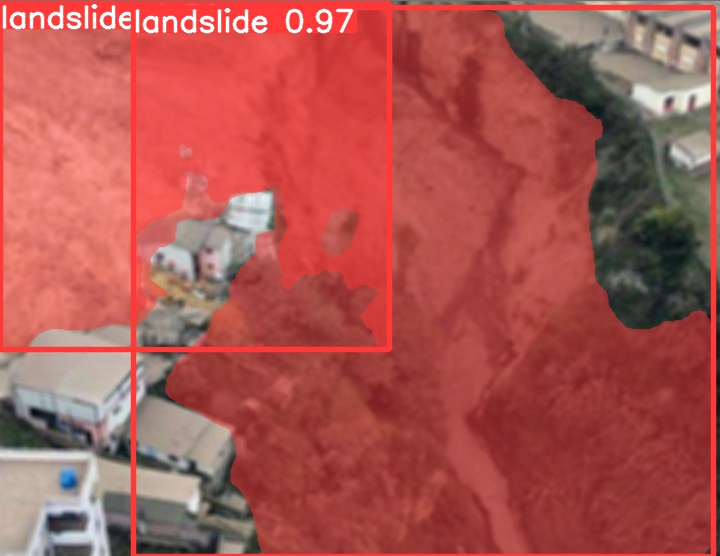

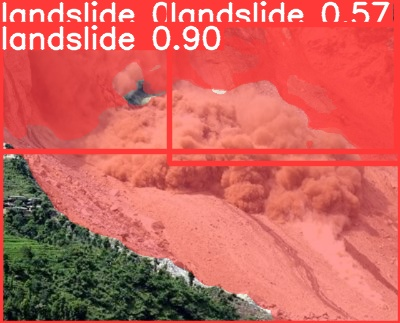

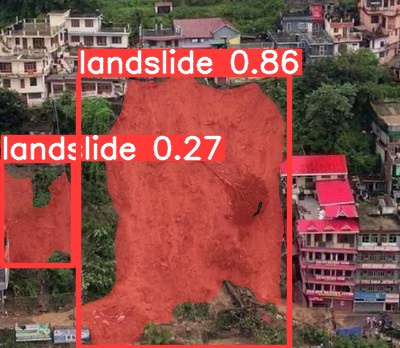

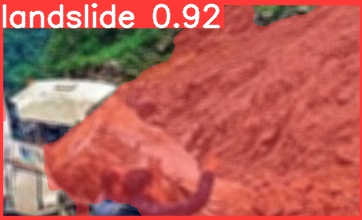

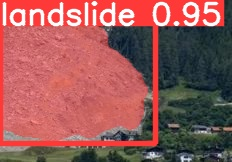

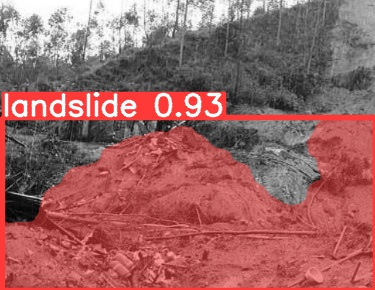

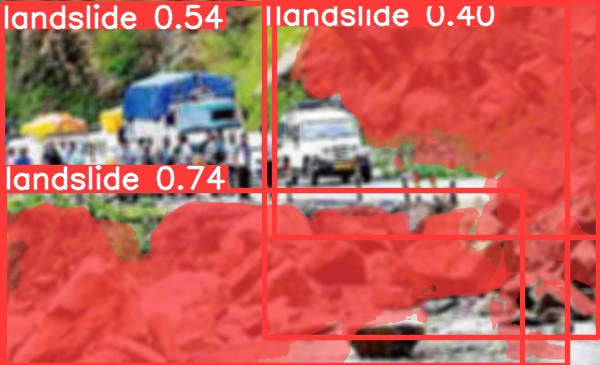

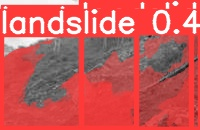

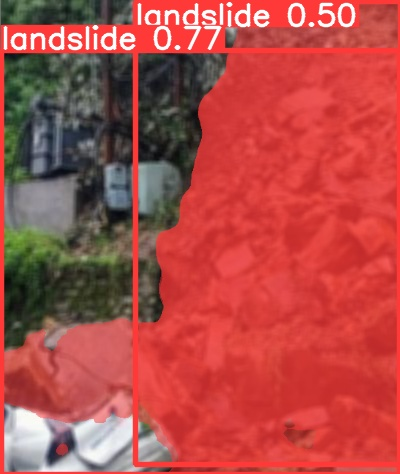

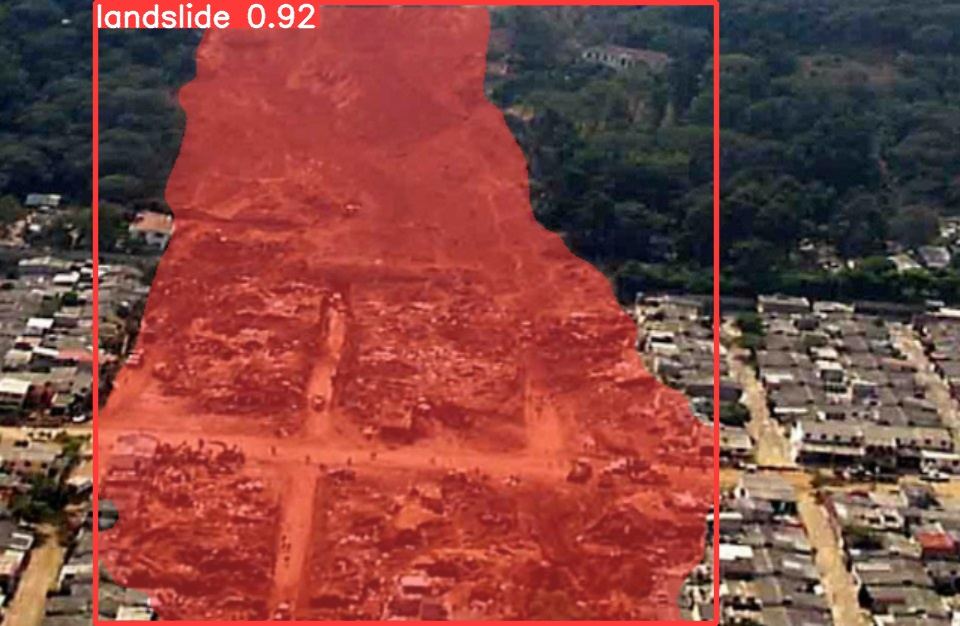

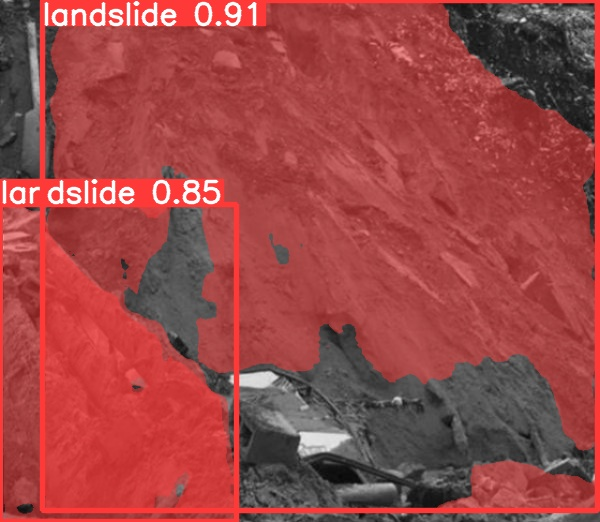

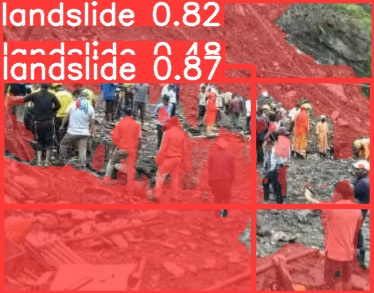

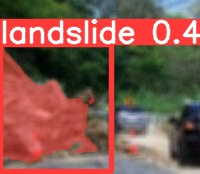

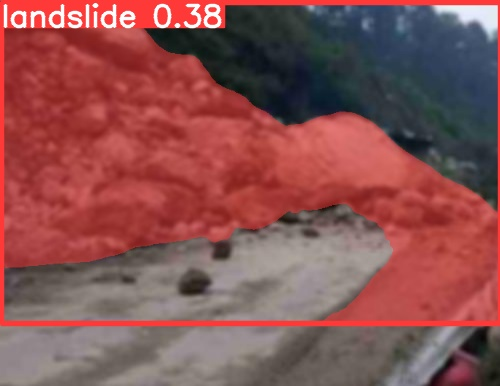

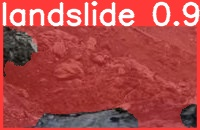

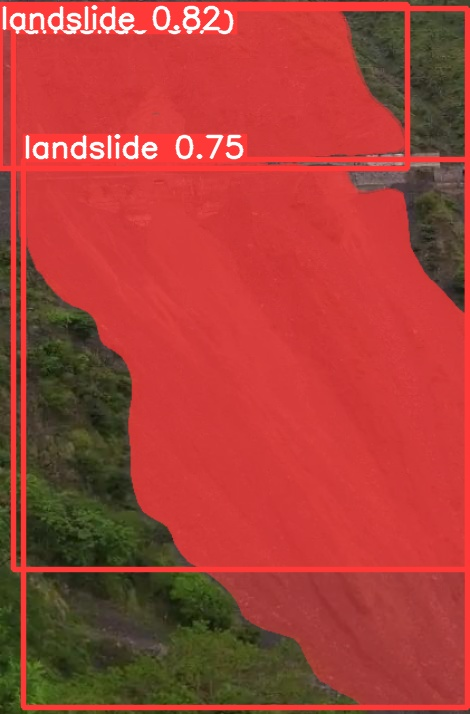

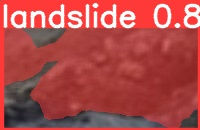

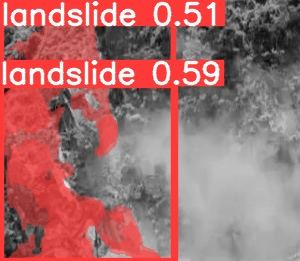

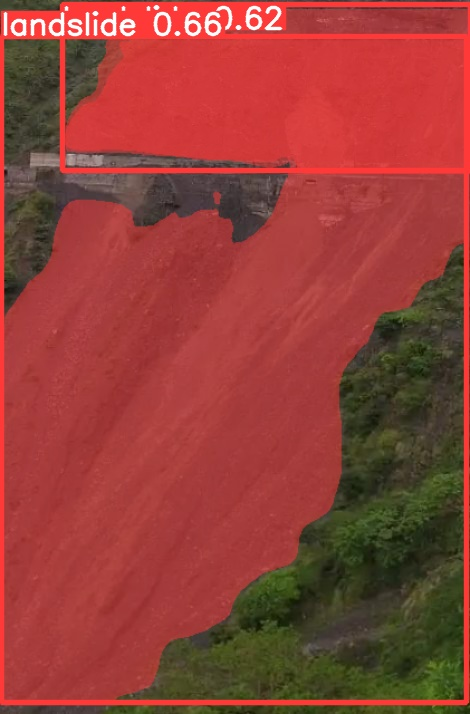

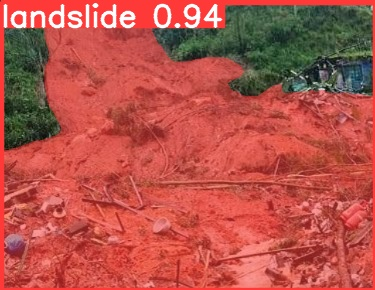

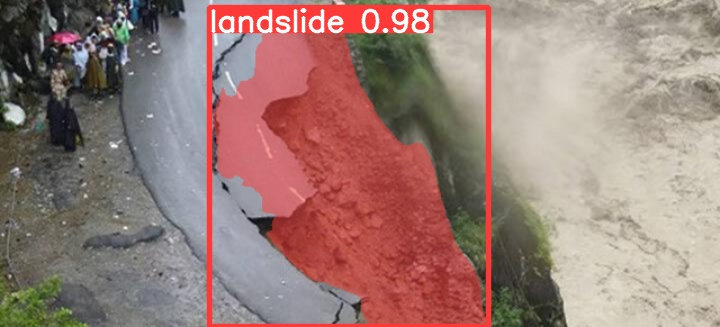

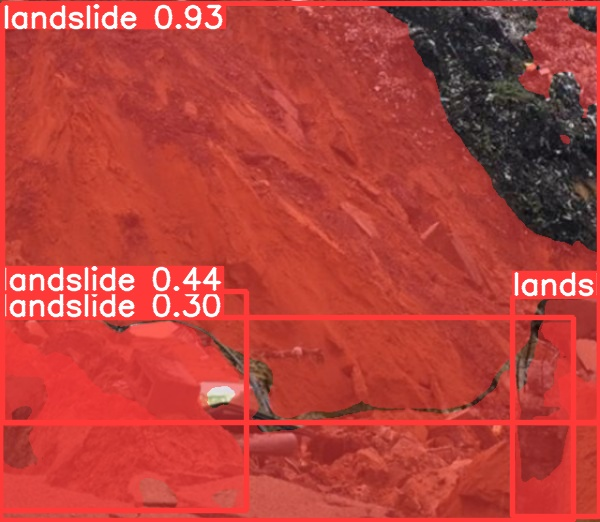

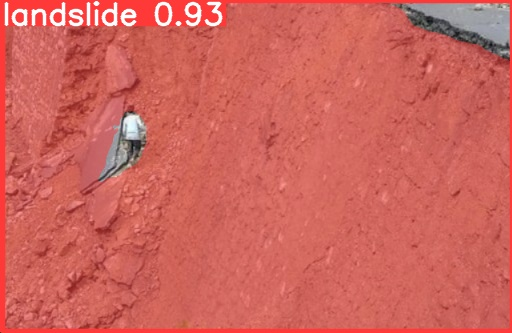

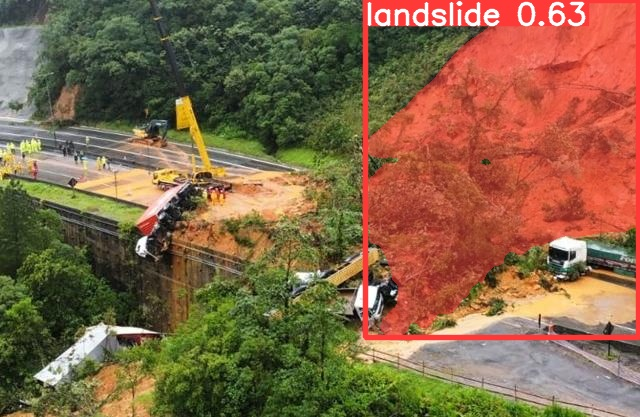

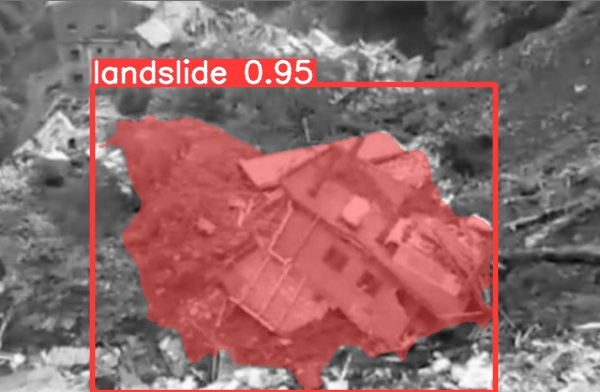

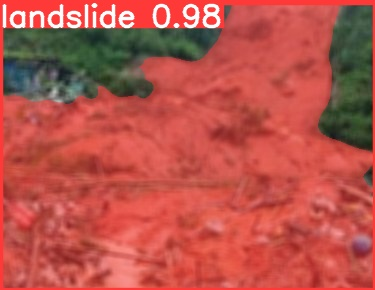

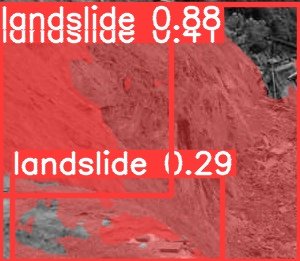

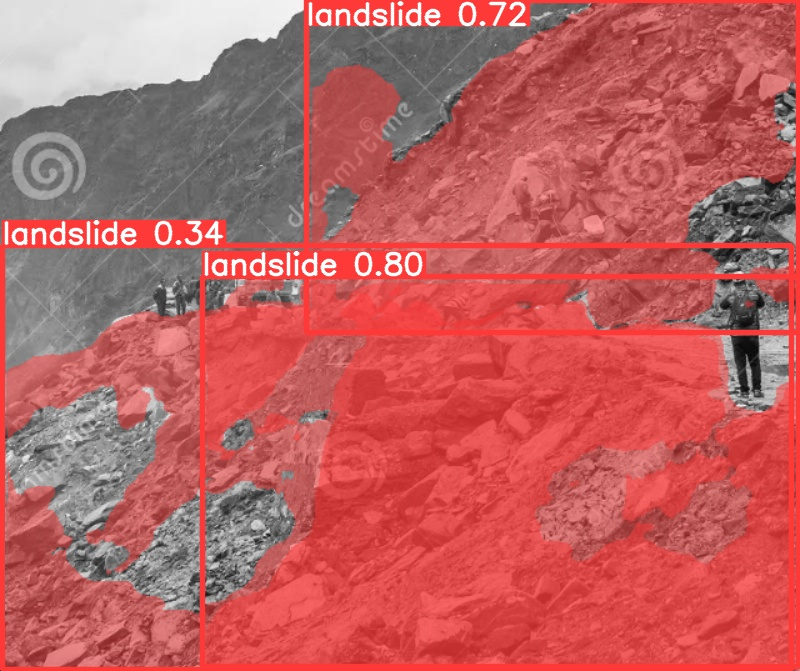

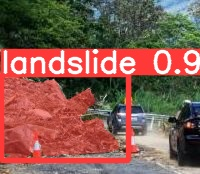

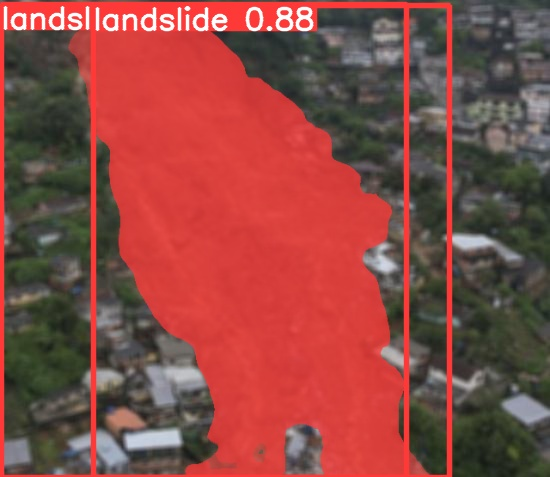

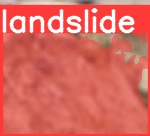

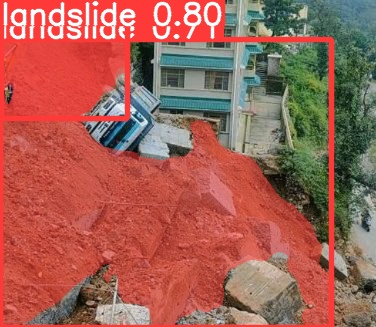

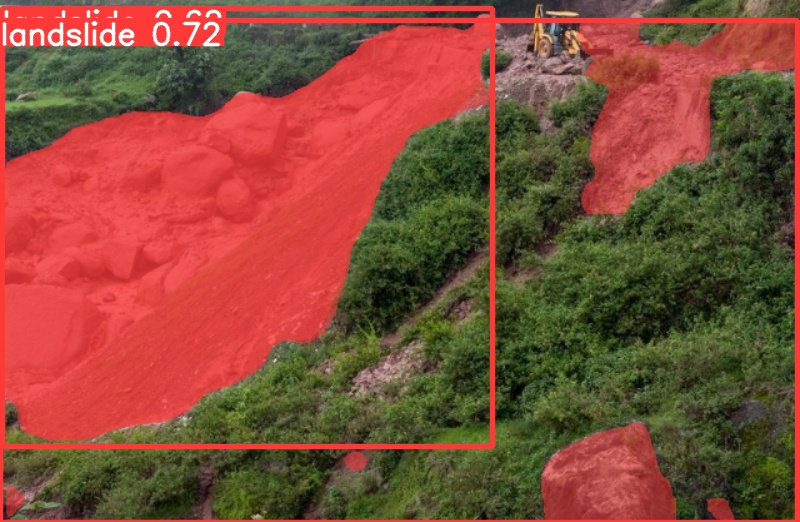

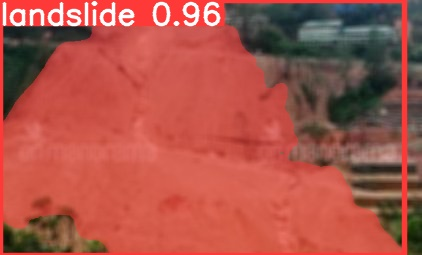

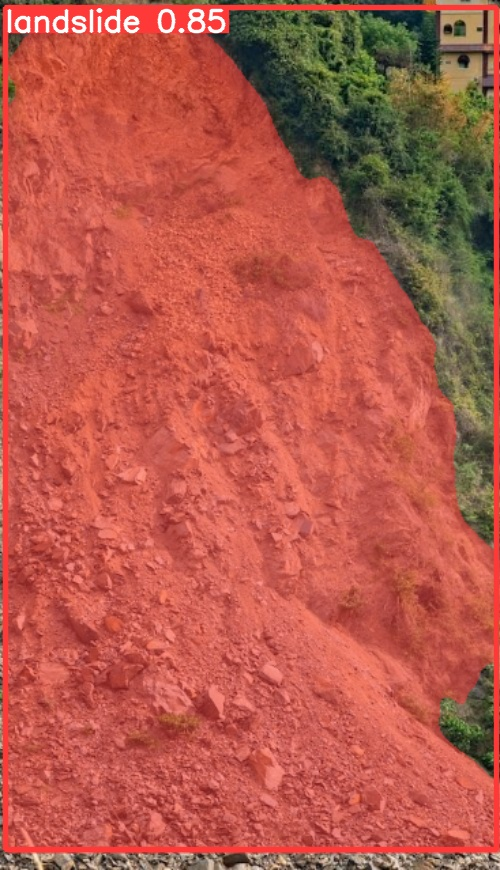

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/segment/predict/*.jpg')[:]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [ ]:
!pip install ultralytics==8.0.28


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 272.6/272.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.5 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27223542 parameters, 0 gradients, 110.0 GFLOPs

0: 480x640 1 landslide, 38.1ms
Speed: 0.5ms pre-process, 38.1ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)


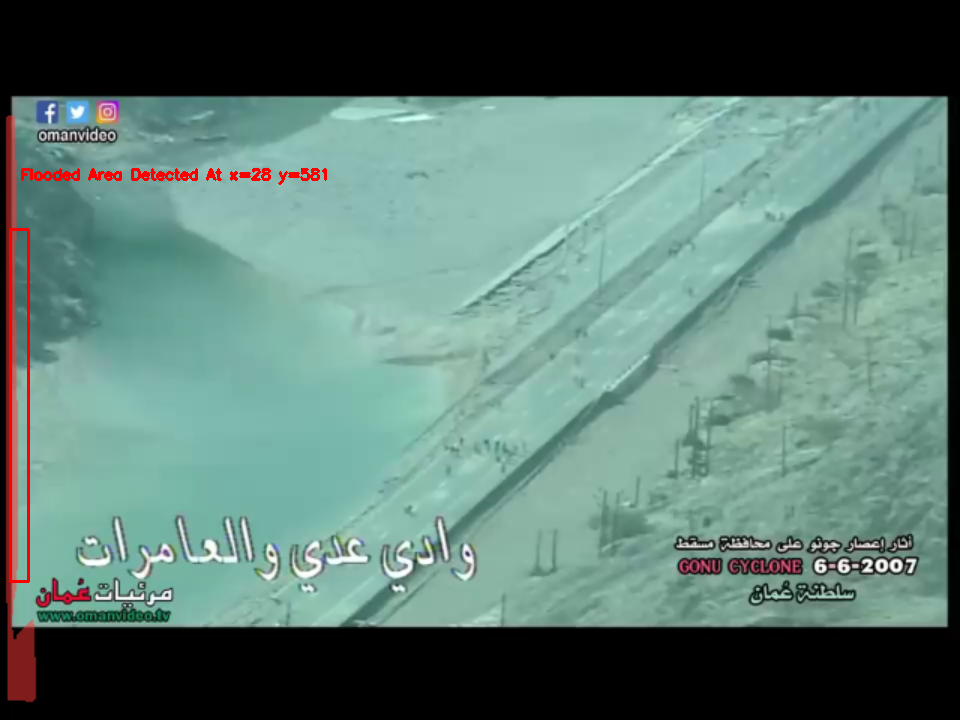

In [ ]:
video_path = "/content/drive/MyDrive/floods/vidTrim.mp4"

model = YOLO("/content/drive/MyDrive/floods/landslides_best.pt")

cap = cv2.VideoCapture(video_path)

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('outpy2.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))


while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
      # Visualize the results on the frame
      results = model(frame, conf=0.05,classes=0)[0]
      for box in results.boxes.xyxy:
          xA = int(box[0] + (box[2] - box[0]) * 0.2)
          yA = int(box[1] + (box[3] - box[1]) * 0.2)
          xB = int(box[2] - (box[2] - box[0]) * 0.2)
          yB = int(box[3] - (box[3] - box[1]) * 0.2)
          cv2.putText(frame, "Flooded Area Detected At x={} y={}".format(xB,yB) , (xA+10, yA-50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
          cv2.rectangle(frame, (xA, yA), (xB, yB), (0, 0, 255), 2)


      cv2_imshow(frame)
      # out.write(frame)
      break

    else:
        # Break the loop if the end of the video is reached
        break

cap.release()
out.release()

In [ ]:

import numpy as np
from ultralytics import YOLO
import cv2
import glob
from google.colab.patches import cv2_imshow

video_path = "/content/drive/MyDrive/floods/outpy.mp4"

model = YOLO("/content/drive/MyDrive/floods/landslides_best.pt")

rf = Roboflow(api_key="VJNHiFqcD3BPuyQxWav8")
project = rf.workspace().project("landslide-area-segmentation")
modelseq = project.version(1).model

cap = cv2.VideoCapture(video_path)

# Default resolutions of the frame are obtained.The default resolutions are system dependent.
# We convert the resolutions from float to integer.
frame_width = int(cap.get(3))
frame_height = int(cap.get(4))

# Define the codec and create VideoWriter object.The output is stored in 'outpy.avi' file.
out = cv2.VideoWriter('outpy3.avi',cv2.VideoWriter_fourcc('M','J','P','G'), 10, (frame_width,frame_height))


while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()
    frame2 = np.copy(frame)
    width, height = frame.shape[1], frame.shape[0]

    if success:
      cv2.imwrite("frame.jpg", frame)
      r = modelseq.predict("frame.jpg", confidence=1).json()
      x1 = int(r['predictions'][0]['x'])
      x2 = int(r['predictions'][0]['y'])


      modelseq.predict("frame.jpg", confidence=1).save("prediction.jpg")

      # Visualize the results on the frame
      frame = cv2.imread("prediction.jpg")

      # results = model(frame, show=False, conf=0.05,classes=0)[0]
      # box = results.boxes.xyxy.tolist()[0]
      # xA = int(box[0] + (box[2] - box[0]) * 0.1)
      # yA = int(box[1] + (box[3] - box[1]) * 0.1)

      cv2.putText(frame, "Landslide Detected At {}".format((x1,x2)) , (x1-280, x2-100), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)
      cv2.putText(frame, "Flood Detected At {}".format((112,130)) , ((112,130)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

      # cv2_imshow(frame)
      print(frame)
      out.write(frame)

    else:
        # Break the loop if the end of the video is reached
        break

cap.release()
out.release()

Streaming output truncated to the last 5000 lines.
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
 

KeyboardInterrupt: ignored